In [44]:
%matplotlib inline
import pandas as pd

In [45]:
myfile = './describer_data.csv'
data = pd.read_csv(myfile)
data.head()

,SessionID,ParticipantID,Condition,Category,VideoID,VideoDuration,numDescriptions,numWords,DescriptionsPerMin,WordCountsPerMin
0,BOTW-C-A,B3,A,Breath of the Wild,BC,302,51,396,10.13245,78.67550
1,Chess-C-A,C1,A,Chess,CC,296,18,118,3.64865,23.91892
2,Chess-B-A,C2,A,Chess,CB,371,42,849,6.79245,137.30458
3,Chess-A-A,C3,A,Chess,CA,375,12,81,1.92000,12.96000
4,Art-A-A,D1,A,Digital Art,DA,338,19,128,3.37278,22.72189


/var/folders/lp/hgtgw2zj57dbm_pjkxm82xs40000gn/T/ipykernel_30054/3234282031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WordCountsPerMin'] = pd.to_numeric(df['WordCountsPerMin'])
/var/folders/lp/hgtgw2zj57dbm_pjkxm82xs40000gn/T/ipykernel_30054/3234282031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DescriptionsPerMin'] = pd.to_numeric(df['DescriptionsPerMin']).plot()


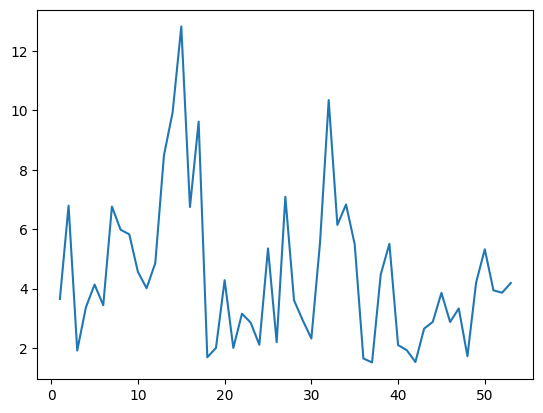

In [53]:
df = data[1:54]
# df.hist()
df['WordCountsPerMin'] = pd.to_numeric(df['WordCountsPerMin'])
df['DescriptionsPerMin'] = pd.to_numeric(df['DescriptionsPerMin'])

In [49]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# from statsmodels.stats.oneway.anova_oneway import anova_oneway
from statsmodels.graphics.factorplots import interaction_plot

model = ols('Condition ~ C(WordCountsPerMin) + C(DescriptionsPerMin) + C(WordCountsPerMin):C(DescriptionsPerMin)', data).fit()
aov_table = anova_lm(data, type=2)
aov_table

ValueError: endog has evaluated to an array with multiple columns that has shape (54, 3). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).